In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys
from numpy import inf
sys.path.insert(0,'../')
import pyfaunus as faunus
plt.xkcd()

In [2]:
faunus.setTemperature(300)
a = faunus.Particle()
b = faunus.Particle()
a.pos = [0,0,0]
b.pos = [1,1,0]
a.charge = 1.0
b.charge = 1.0
a.id = 0
b.id = 1

In [3]:
eps = 1*2.5 # kJ/mol
atomdata = [{ 'Na': dict( sigma=1.0, eps=eps, q=1.0) },
            { 'Cl': dict( sigma=1.0, eps=eps, q=1.0) }]
faunus.atoms.from_list(atomdata)

def lennardjones(a, b, r):
    d = { 'default' : [
        { 'lennardjones': { 'mixing': 'LB'} }] }
    pot = faunus.FunctorPotential( d )
    return np.array( [pot.energy( a, b, i, [0,0,i] ) for i in r] )

def wca(a, b, r):
    d = { 'default' : [
        { 'wca': { 'mixing': 'LB'} }] }
    pot = faunus.FunctorPotential( d )
    return np.array( [pot.energy( a, b, i, [0,0,i] ) for i in r] )

def squarewell(a, b, r):
    d = { 'default' : [
        { 'squarewell': {'mixing':'LB'} }] }
    pot = faunus.FunctorPotential( d )
    return np.array( [pot.energy( a, b, i, [0,0,i] ) for i in r] )

def hardsphere(a, b, r):
    d = { 'default' : [
        { 'hardsphere': {'mixing': 'arithmetic'} }] }
    pot = faunus.FunctorPotential( d )
    u = np.array( [pot.energy( a, b, i, [0,0,i] ) for i in r] )
    u[u == inf] = 1000
    return u

def cos2(a, b, r):
    d = { 'default' : [
        { 'cos2': {'rc': 1, 'eps': eps, 'wc': 0.5} }] }
    pot = faunus.FunctorPotential( d )
    u = np.array( [pot.energy( a, b, i, [0,0,i] ) for i in r] )
    u[u == inf] = 1000
    return u

def hertz(a, b, r):
    d = { 'default' : [
        { 'hertz': {'mixing': 'LB'} }] }
    pot = faunus.FunctorPotential( d )
    u = np.array( [pot.energy( a, b, i, [0,0,i] ) for i in r] )
    u[u == inf] = 1000
    return u

def coulomb(a, b, r):
    d = { 'default' : [
        { 'coulomb': { 'epsr': 80, 'type': 'plain', 'cutoff': 1000 } }] }
    pot = faunus.FunctorPotential( d )
    return np.array( [pot.energy( a, b, i, [0,0,i] ) for i in r] )

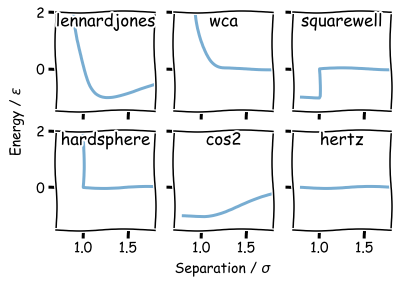

In [4]:
lw=3
alpha=0.6
sigma=1.0
r = np.linspace(0.8*sigma,2*sigma, 500)

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

axs[0,0].set_ylim(-1.5,2)
axs[0,0].set_title('lennardjones', y=0.8)
axs[0,0].plot(r,lennardjones(a,b,r), lw=lw, alpha=alpha, label='lennardjones')

axs[0,1].set_title('wca', y=0.8)
axs[0,1].plot(r,wca(a,b,r), lw=lw, alpha=alpha, label='wca', ls='-')

axs[0,2].set_title('squarewell', y=0.8)
axs[0,2].plot(r,squarewell(a,b,r), lw=lw, alpha=alpha, label='squarewell')

axs[1,0].set_title('hardsphere', y=0.8)
axs[1,0].plot(r,hardsphere(a,b,r), lw=lw, alpha=alpha, label='hardsphere', ls='-')

axs[1,1].set_title('cos2', y=0.8)
axs[1,1].plot(r,cos2(a,b,r), lw=lw, alpha=alpha, label='cos2', ls='-')

axs[1,2].set_title('hertz', y=0.8)
axs[1,2].plot(r,hertz(a,b,r), lw=lw, alpha=alpha, label='hertz', ls='-')

axs[0,0].set_ylim(-1.5,2)
axs[0,0].set_xlim(0.7,1.8)

# common axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False,
                labeltop=False, labelbottom=False, labelleft=False, labelright=False)
plt.grid(False)
plt.ylabel(r"Energy / $\epsilon$", labelpad=30)
plt.xlabel(r"Separation / $\sigma$", labelpad=30)
plt.plot();